<font color="#483D8B">
<h1 align="center"> Linear Regression </h1>
<h3 align="center"> Evan Ditter </h3>
<h3 align="center">February 20th, 2019</h3>
</font>

# Overview 
In this lab I will explore an airfare dataset from the fourth quarter of 2002. I want to perform linear regressions of the different data attributes to help determine which ones are the best indicator of the Price attribute. The data set in the Data section shows the different attributes. The Price attribute is the price of the low price airline for a particular flight. 

The references below were used to implement the linear regressions in Python. The link to the dataset is also below that ends in "*.dat" 

**References**:   
https://towardsdatascience.com/linear-regression-using-python-ce21aa90ade6  
http://users.stat.ufl.edu/~winner/data/airq402.dat  
https://towardsdatascience.com/simple-and-multiple-linear-regression-in-python-c928425168f9  

## Data

Definitions:  
**Linear Regression** - Linear regression is a basic and commonly used type of predictive analysis.  The overall idea of regression is to examine if a set of predictor variables do a good job in predicting an outcome (dependent) variable and which variables in particular are significant predictors of the outcome variable, and in what way do they–indicated by the magnitude and sign of the beta estimates–impact the outcome variable.

**R-Squared** - R-squared is a statistical measure of how close the data are to the fitted regression line. Throughout the linear regressions taken in this lab, the main measure I will look at for the accuracy of the regression line is the R-Squared value. An R-squared value of 1.0 means a perfect fit (which almost never happens in practice) and a value of 0.0 means there is no correlation between the independent and dependent sets. 


In [34]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import linear_model
import statsmodels.api as sm
df = pd.read_csv('airq402.dat', '\s+')
df.columns= ['City1', 'City2', 'Average Fare', 'Distance', 'Average Weekly Passengers', 'Market Leading Airline', 
            'Market Share (Leader)', 'Average Fare (Leader)', 'Low Price Airline', 'Market Share (Low Price)', 'Price']
df

,City1,City2,Average Fare,Distance,Average Weekly Passengers,Market Leading Airline,Market Share (Leader),Average Fare (Leader),Low Price Airline,Market Share (Low Price),Price
0,CAK,MCO,122.47,860,276.84,FL,75.10,123.09,DL,17.23,118.94
1,ALB,ATL,214.42,852,215.76,DL,78.89,223.98,CO,2.77,167.12
2,ALB,BWI,69.40,288,606.84,WN,96.97,68.86,WN,96.97,68.86
3,ALB,ORD,158.13,723,313.04,UA,39.79,161.36,WN,15.34,145.42
4,ALB,FLL,135.17,1204,199.02,WN,40.68,137.97,DL,17.09,127.69
5,ALB,LAS,152.85,2237,237.17,WN,59.94,148.59,WN,59.94,148.59
6,ALB,LAX,190.73,2467,191.95,DL,17.89,205.06,US,16.59,174.00
7,ALB,MCO,129.35,1073,550.54,WN,76.84,127.69,WN,76.84,127.69
8,ALB,TPA,134.17,1130,202.93,US,35.40,132.91,DL,26.40,124.78
9,ABQ,ATL,212.49,1269,198.80,DL,68.39,226.79,AA,11.91,200.93


The data set above is from http://users.stat.ufl.edu/~winner/data/airq402.dat  
Dataset:   airq402.dat  
Source: U.S. Department of Transportation  

Description: Airfares and passengers for U.S. Domestic Routes
for 4th Quarter of 2002.

Variables/Columns:  
City1 (start) - starting point. Datatype - object  
City2 (destination) - the destination. Datatype - object  
Average Fare - Average price of the ticket from the starting point to destination. Datatype - float64   
Distance - how long the plane ride is. Datatype - int64  
Average Weekly Passengers - how many people take this trip. Datatype - float64  
Market Leading Airline -  Most popular airline for this trip. Datatype - object   
Market Share (Leader) - Percentage of market share particular airlines has for particular flight. Datatype - float64  
Average Fare (Leader) - average fare of the leading airline. Datatype - float64   
Low Price Airline - Cheapest option for particular flight. Datatype - object    
Market Share (Low Price) - Percentage of market share for the cheaper airline. Datatype - float64    
Price (Low Price) - Price of the cheaper airline. Datatype - float64    

## Exploratory Data Analysis

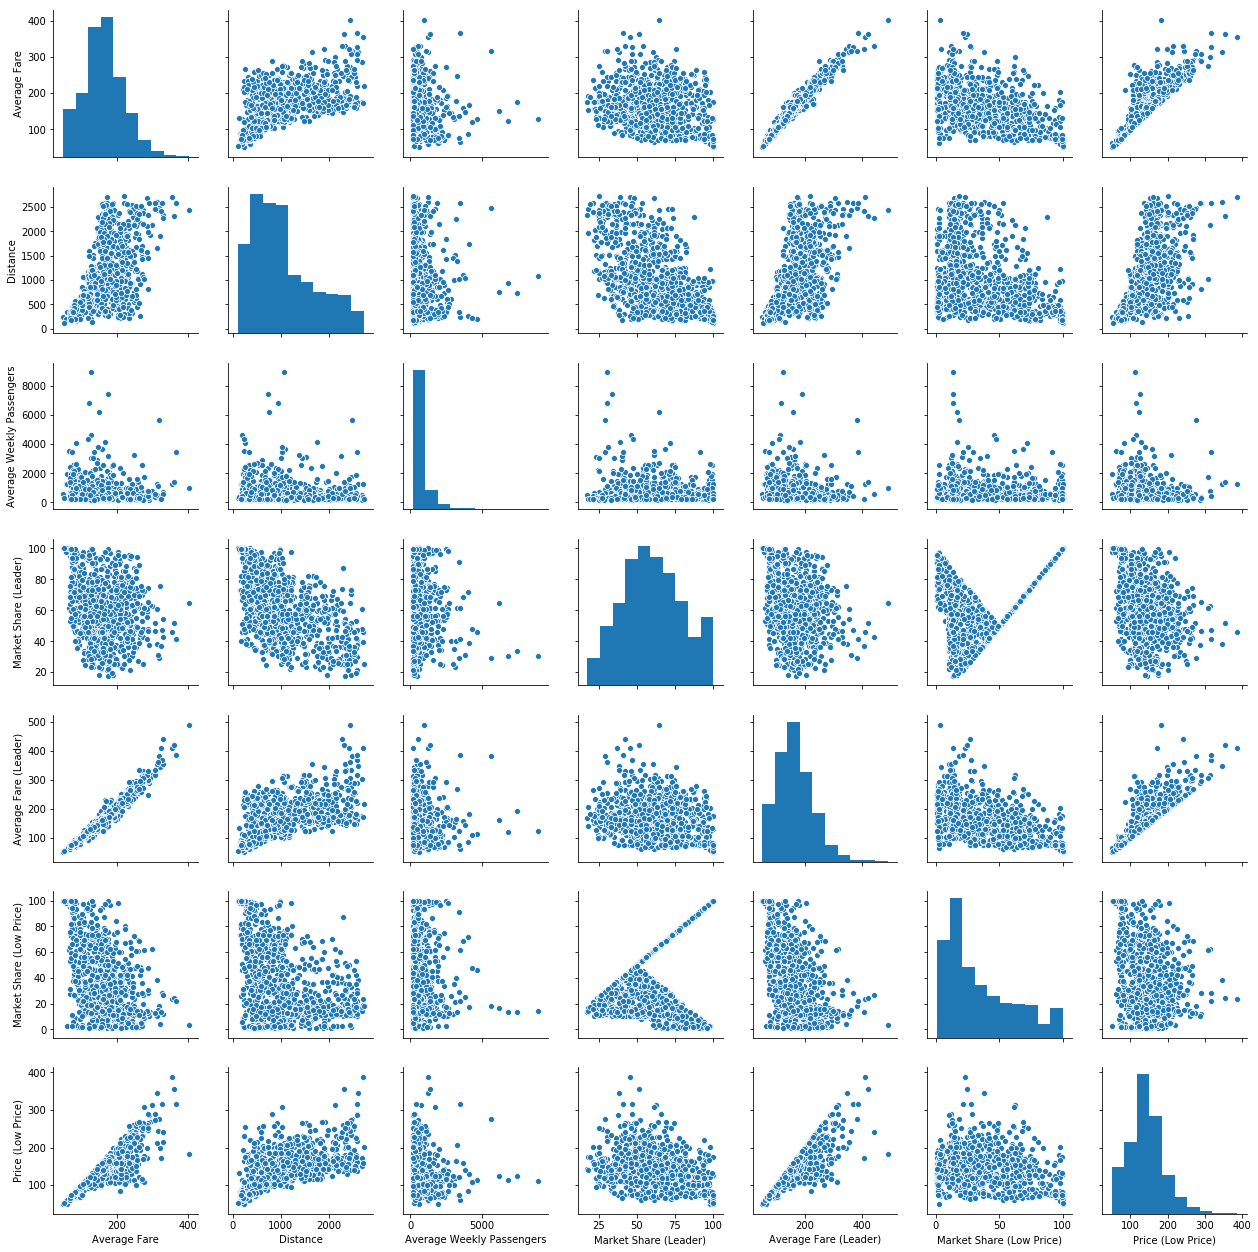

In [16]:
sns.pairplot(df)

Above are basic plots for everyset of attributes that use numbers. The object data type attributes will not be used in the models I create as there is no intuitive way to assign values to them.   

Below I will start to perform linear regressions on different attributes of the data set keeping in mind I want to have Price as the dependent or response variable. The Price variable is the price of the lowest price airline for a particular trip

In [58]:
target = pd.DataFrame(df, columns=['Price'])
new_data = df.select_dtypes(include='float')
X = df['Distance']
y = target['Price']

model = sm.OLS(y, X).fit()
predictions = model.predict(X)
model.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.821
Model:                            OLS   Adj. R-squared:                  0.821
Method:                 Least Squares   F-statistic:                     4591.
Date:                Fri, 22 Feb 2019   Prob (F-statistic):               0.00
Time:                        16:33:53   Log-Likelihood:                -5568.0
No. Observations:                 999   AIC:                         1.114e+04
Df Residuals:                     998   BIC:                         1.114e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Distance       0.1104      0.002     67.755      0.000       0.107       0.114
==============================================================================
Omnibus:                       32.726   Durbin-Watson:                   1.329
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               41.320
Skew:                          -0.355   Prob(JB):                     1.07e-09
Kurtosis:                       3.698   Cond. No.                         1.00
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

The first basic linear regression I chose was on the "Distance" attribute as I thought it would be a solid indicator of Price. The R-Squared value was 0.821 which means there is a good correlation found, but still not a perfect fit. Next, I want a baseline R-squared value that uses all of the integer/float (non-object) value attributes.  

In [2]:
X = df[['Average Fare', 'Distance','Average Weekly Passengers', 'Market Share (Leader)', 'Average Fare (Leader)', 'Market Share (Low Price)']]
y = target['Price']
model = sm.OLS(y, X).fit()
predictions = model.predict(X)
model.summary()

NameError: name 'df' is not defined

Above showed a multiple linear regression model on the data with non-object attributes with Price as the response variable. Using all the integer/float attributes created an R-squared value of 0.982 which means the other variables can be a great prediction of what the price of the low fare airline will be.  

In [3]:
X = df['Average Fare']
y = target['Price']
model = sm.OLS(y, X).fit()
predictions = model.predict(X)
model.summary()

NameError: name 'df' is not defined

In this single linear regression on the attribute "Average Fare" the R-squared value was 0.973 which shows it can be a great prediction of the low-price airline. This seems intuitive as the average fare for a particular flight will always be in the realm of the low price. Because of this, I think including "Average Fare", or "Average Fare (Leader)" in multiple linear regressions will skew the R-squared value to be high. In my next multiple linear regression, I will not include the average fare attributes to see if the other attibutes can be a valid predictor of the Price attribute. 

To save some space and redundacy of testing every 1-on-1 linear regression of the interger/float (or non-object) variables with the Price attribute, I computed the R-Square values and have them below:  

Average Fare - 0.973    
Average Fare (Leader) - 0.960    
Distance - 0.821    
Market Share (Leader) - 0.765    
Market Share (Low Price) - 0.491  
Average Weekly Passengers - 0.351  

As you can see, the Average Fare attributes have a very high R-Squared value whereas the others have a smaller correlation with Average Weekly Passengers having a relatively low correlation at 0.351.  

In the following multiple linear regression, I will include all of the non-object attributes excluding the average fare attributes.

In [65]:
X = df[['Distance', 'Average Weekly Passengers', 'Market Share (Leader)', 'Market Share (Low Price)']]
y = target['Price']
model = sm.OLS(y, X).fit()
predictions = model.predict(X)
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.920
Model:                            OLS   Adj. R-squared:                  0.920
Method:                 Least Squares   F-statistic:                     2854.
Date:                Fri, 22 Feb 2019   Prob (F-statistic):               0.00
Time:                        16:43:23   Log-Likelihood:                -5168.0
No. Observations:                 999   AIC:                         1.034e+04
Df Residuals:                     995   BIC:                         1.036e+04
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
=============================================================================================
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
Distance                      0.0700      0.002     43.099      0.000       0.067       0.073
Average Weekly Passengers     0.0020      0.002      1.199      0.231      -0.001       0.005
Market Share (Leader)         0.9915      0.045     21.844      0.000       0.902       1.081
Market Share (Low Price)      0.1377      0.053      2.612      0.009       0.034       0.241
==============================================================================
Omnibus:                       88.969   Durbin-Watson:                   1.619
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              118.550
Skew:                           0.718   Prob(JB):                     1.81e-26
Kurtosis:                       3.886   Cond. No.                         66.4
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

The resultant R-squared value is 0.920 which helps us conclude that this group of attributes can be a solid predictor of the Price attribute.

## Conclusion 
I was given an airfare data set and asked to perform linear regressions on the data with Price as the response variable. If one were to want a single attribute to be a predictor of Price from the data set, you could choose either "Average Fare" or "Average Fare (Leader)" both of which had R-Squared values over 0.96. 

Performing a multiple linear regression on the collection of non-object attributes resulted in an R-Squared value of 0.982 which concludes the grouping to be a very good predictor of the Price attribute. Given that both the "Average Fare" and "Average Fare (Leader)" attributes were also prices in a similar range as the "Price" attribute, they should have high R-squared values and in turn be good predictors of the Price attribute. Exluding these two fare attributes, the other non-object attributes ('Distance', 'Average Weekly Passengers', 'Market Share (Leader)', 'Market Share (Low Price)') produce an R-Squared value of 0.920 which should prove to be a good predictor of the Price attribute as well.   